# 顧客の評価
## 7.1 顧客のセグメンテーション
### 7.1.1 セグメンテーションの基準
### 7.1.2 クラスタ分析によるセグメンテーション

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [2]:
df_id_pos = pd.read_excel('978-4-274-22101-9.xlsx', 'ID付きPOSデータ（POSデータ）')
df_id_pos.head()

,レシートNo,日,時間,顧客ID,税抜価格,税抜単価,個数,大カテゴリ番号,大カテゴリ名,中カテゴリ番号,中カテゴリ名,小カテゴリ番号,小カテゴリ名
0,1,1,9,1518,50,10,5,11,農産,1113,野菜,111327,じゃが芋
1,1,1,9,1518,50,10,5,11,農産,1113,野菜,111363,玉葱
2,1,1,9,1518,90,90,1,11,農産,1113,野菜,111361,レタス
3,1,1,9,1518,185,185,1,11,農産,1113,野菜,111339,トマト
4,2,1,9,1532,85,85,1,11,農産,1113,野菜,111318,キャベツ


In [3]:
df_id_receipt = df_id_pos.groupby(['顧客ID', 'レシートNo'])['税抜価格'].sum()
loyal8 = df_id_receipt.count('顧客ID') >= 8
loyal8_cust_ids = loyal8[loyal8].index.values  # boolean array filtering

def tp(x):
    if x <=12:
        return '午前'
    elif x <= 15:
        return '午後'
    elif x <= 18:
        return '夕方'
    else:
        return '夜間'

df_id_pos0 = pd.DataFrame(df_id_pos)
df_id_pos0['時間帯'] = df_id_pos0['時間'].apply(tp)
df_id_pos0 = df_id_pos0[df_id_pos0['顧客ID'].isin(loyal8_cust_ids)]
df_id_tp_amount = pd.DataFrame(df_id_pos0.groupby(['顧客ID', '時間帯', 'レシートNo'])['税抜価格'].sum())
df_id_tp_amount.columns = ['購買金額']
df_id_tp_amount = df_id_tp_amount.mean(level=['顧客ID', '時間帯']).round()
df_id_tp_amount = df_id_tp_amount.unstack().fillna(0)
df_id_tp_amount

購買金額                        
時間帯       午前      午後      夕方      夜間
顧客ID                                
1001     0.0  2110.0  2594.0  2960.0
1002  1675.0  2153.0  1622.0     0.0
1004     0.0  2025.0  2151.0  2363.0
1005  1729.0     0.0     0.0     0.0
1006     0.0     0.0  1304.0  1075.0
1007     0.0     0.0  2012.0  1727.0
1008     0.0     0.0  1758.0     0.0
1009     0.0     0.0  2076.0  1382.0
1011  2205.0  1335.0     0.0  1278.0
1014     0.0     0.0  1309.0   744.0
1020  1560.0  1008.0  2631.0  2196.0
1023  1497.0  1573.0  1211.0   445.0
1026  1526.0  1050.0  1480.0     0.0
1027   745.0   755.0     0.0   613.0
1030     0.0  2018.0  2002.0     0.0
1036  2762.0  2120.0  3162.0     0.0
1037  1870.0  2070.0  2149.0  2312.0
1046     0.0     0.0   775.0  1007.0
1049     0.0     0.0  2400.0  2482.0
1050     0.0  2892.0   660.0     0.0
1051  6890.0  3995.0  3633.0  4488.0
1052     0.0  4364.0     0.0     0.0
1055     0.0     0.0     0.0  4481.0
1056  2793.0   900.0   190.0     0.0
1061  1900.0   415.0  2188.0     0.0
1063     0.0   400.0   360.0   426.0
1064  1310.0  3155.0  4577.0     0.0
1069  3540.0  1871.0     0.0     0.0
1072   919.0   357.0   782.0   653.0
1074  1665.0     0.0  1431.0   927.0
...      ...     ...     ...     ...
1881     0.0     0.0  1048.0  1833.0
1885     0.0     0.0     0.0   865.0
1890     0.0  1082.0  1542.0     0.0
1892  1998.0  1399.0  1142.0   818.0
1896  1054.0     0.0     0.0     0.0
1903  2510.0  3088.0  3830.0  3532.0
1908   571.0     0.0   698.0     0.0
1911     0.0     0.0  4960.0  4796.0
1914     0.0  6005.0  2791.0  2225.0
1919     0.0  2150.0  1745.0  3820.0
1926  4097.0  3131.0  3573.0     0.0
1930  6582.0  3155.0  1921.0  2731.0
1934  4566.0  6915.0  2475.0  2760.0
1935  1270.0  2168.0  1741.0     0.0
1937  2730.0  3437.0  2049.0  1942.0
1939  1170.0  1322.0     0.0     0.0
1948  1392.0  2633.0   972.0   935.0
1952  4062.0  2710.0  3275.0     0.0
1962  1952.0  1585.0  2011.0  1287.0
1965  6030.0  2618.0  3314.0     0.0
1973  1335.0   922.0     0.0  1910.0
1982     0.0  3703.0  2507.0  3095.0
1984  1005.0   558.0     0.0   648.0
1987     0.0  2028.0  1923.0     0.0
1990  2370.0  4160.0  3898.0     0.0
1991   693.0  1694.0   785.0     0.0
1995  1648.0  1451.0  1078.0   451.0
1997  2590.0  2442.0  2030.0     0.0
1999     0.0  2965.0  3204.0     0.0
2000     0.0  4290.0  5500.0     0.0

[344 rows x 4 columns]

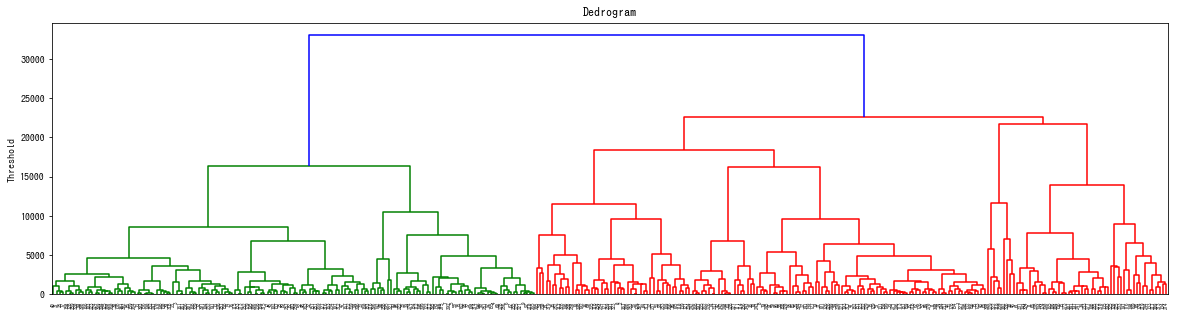

[2 2 2 1 1 1 1 1 2 1 2 2 2 1 2 4 2 1 1 2 3 2 2 1 2 1 2 2 1 1 1 1 1 1 4 1 2
 1 2 1 1 2 2 2 2 1 3 1 1 1 2 2 1 2 2 1 2 2 2 2 1 4 2 2 2 2 4 1 4 2 2 4 1 1
 1 2 1 1 2 2 2 2 1 2 2 1 2 2 1 1 1 2 1 2 1 2 1 1 1 1 1 2 1 1 1 2 4 1 4 2 2
 2 1 2 2 1 4 2 2 3 4 2 1 2 4 1 2 1 1 2 1 2 2 4 4 4 4 1 1 2 4 2 1 4 4 1 2 4
 1 2 2 2 1 1 2 1 1 1 1 1 1 1 1 1 1 4 1 1 1 4 1 2 1 2 4 2 2 2 2 1 1 1 2 1 1
 1 2 2 2 2 1 1 2 2 2 1 1 4 1 2 1 1 3 1 4 2 1 4 2 4 1 2 1 1 4 1 1 4 2 4 2 1
 1 1 1 4 2 2 2 2 2 2 1 4 1 2 1 2 1 3 2 4 2 2 4 2 2 1 2 2 1 1 1 2 2 1 2 1 1
 1 1 1 2 1 1 1 2 2 2 1 2 2 4 4 1 1 2 4 1 3 2 1 2 2 2 4 1 1 2 2 4 2 1 4 1 1
 1 2 2 1 3 1 1 1 2 1 1 2 1 1 4 2 1 4 1 1 1 2 1 2 1 1 3 2 4 4 3 2 2 1 2 4 2
 4 2 2 1 2 4 1 2 4 2 2]


In [4]:
matplotlib.pyplot.rcParams['figure.figsize'] = (20.0, 5.0)

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

linkage = linkage(df_id_tp_amount, method='ward' ,metric='euclidean')
dendrogram(linkage)
plt.title("Dedrogram")
plt.ylabel("Threshold")
plt.show()

# t = 0.7 * max(linkage[:, 2])
t = 0.6 * max(linkage[:, 2])
group = fcluster(linkage, t, criterion='distance')
print(group)

In [5]:
df_id_tp_amount['group'] = group

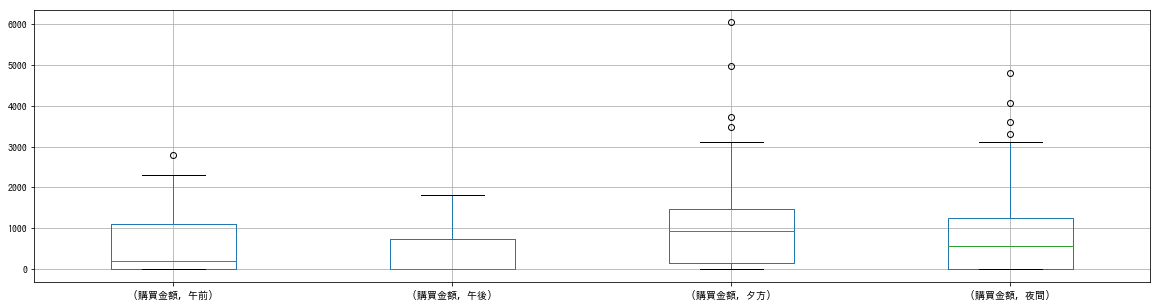

In [6]:
# クラスタ1
df_id_tp_amount[df_id_tp_amount['group'] == 1].drop(['group'], axis=1).boxplot()

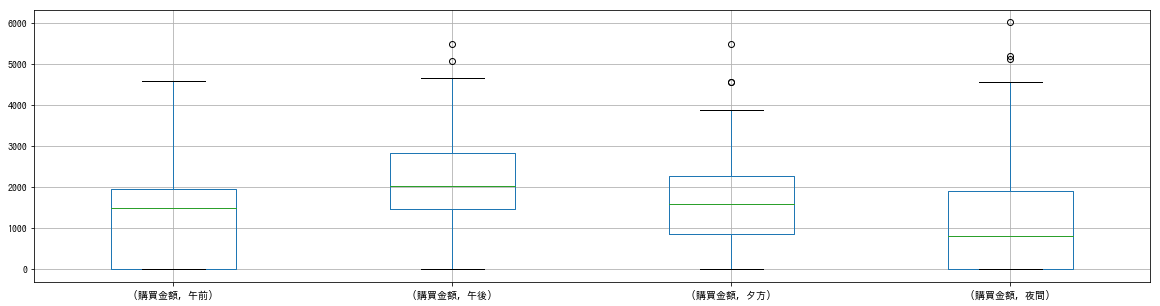

In [7]:
# クラスタ2
df_id_tp_amount[df_id_tp_amount['group'] == 2].drop(['group'], axis=1).boxplot()

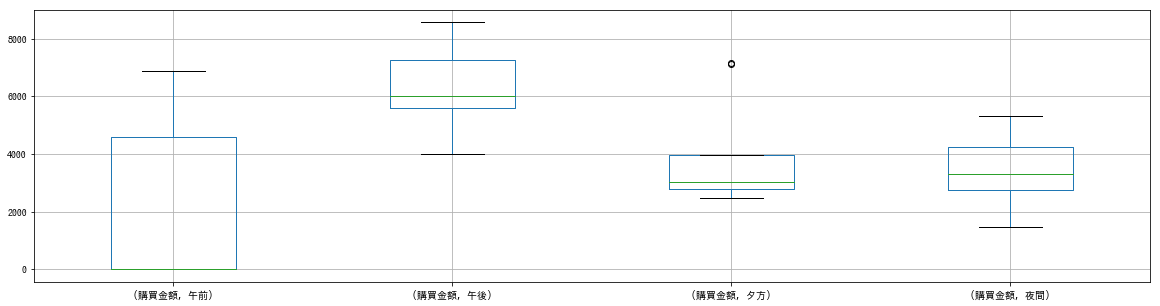

In [8]:
# クラスタ3
df_id_tp_amount[df_id_tp_amount['group'] == 3].drop(['group'], axis=1).boxplot()

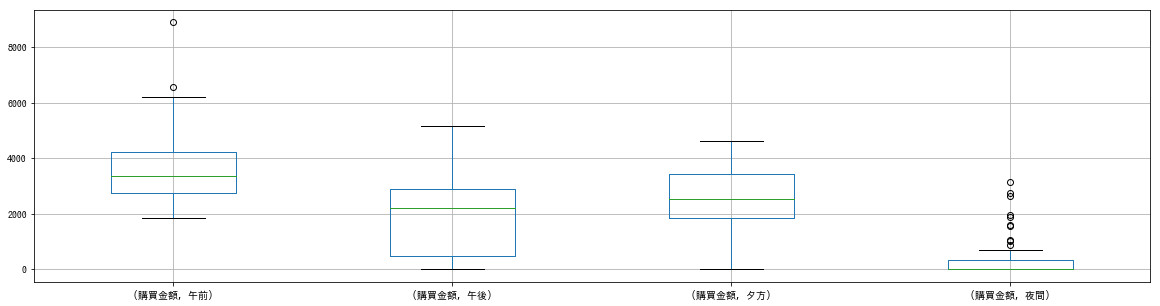

In [9]:
# クラスタ4
df_id_tp_amount[df_id_tp_amount['group'] == 4].drop(['group'], axis=1).boxplot()

## 7.2 優良顧客の評価
### 7.2.1 RFM分析

In [44]:
df_id_pos.head()

NameError: name 'df_id_pos' is not defined

In [33]:
df_rfm = pd.DataFrame()

# １日〜25日までが集計対象、Rの基準日は26日
df_id_pos_25 = df_id_pos[df_id_pos['日'] <= 25]

df_rfm['R'] = 26 - df_id_pos_25.groupby(['顧客ID'])['日'].max()
df_rfm['F'] = df_id_pos_25.groupby(['顧客ID', '日']).size().groupby(['顧客ID']).size()
df_rfm['M'] = df_id_pos_25.groupby(['顧客ID'])['税抜価格'].sum()
df_rfm.head()

,R,F,M
顧客ID,,,
1001,1,20,58230
1002,8,13,25920
1004,2,8,17830
1005,3,7,12310
1006,1,7,8650


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5463814588>,
      dtype=object)

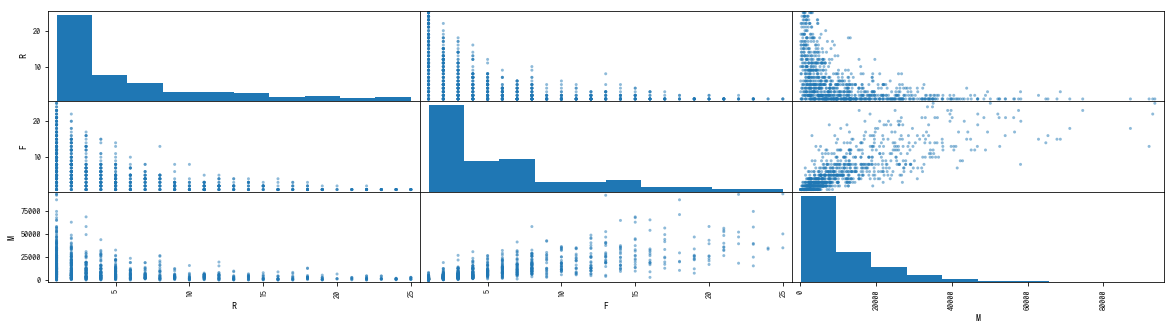

In [12]:
# ヒストグラムと散布図
pd.plotting.scatter_matrix(df_rfm)

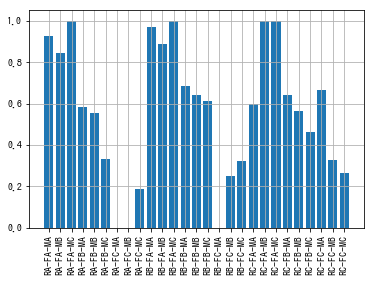

In [35]:
# RFMそれぞれをクラス分けして購買生起確率を求める
cls = ['A', 'B', 'C']
keys= ['R' + r + '-F' + f + '-M' + m for r in cls for f in cls for m in cls]

conds = [
    [lambda c: c == 1, lambda c: (c >= 2) & (c <= 5), lambda c: c >= 6],
    [lambda c: c >= 7, lambda c: (c >= 3) & (c <= 6), lambda c: c <= 2],
    [lambda c: c >= 12551, lambda c: (c >= 4151) & (c <= 12550), lambda c: c <= 4150]
]

# df_rfm をクラス毎に分ける
df_rfm_classified = [df_rfm[conds[0][r](df_rfm['R']) & conds[1][f](df_rfm['F']) & conds[2][m](df_rfm['M'])] for r in range(3) for f in range(3) for m in range(3)]
# クラス毎の顧客IDをsetにする
rfm_classified_id_sets = map(lambda df: set(df.index.values), df_rfm_classified)
# 26日〜30日に購買があった顧客IDを抽出
target_id_set = set(df_id_pos[(df_id_pos['日'] >= 26) & (df_id_pos['日'] <= 30)]['顧客ID'].values)

props = []
for c in rfm_classified_id_sets:
    props.append(len(c & target_id_set) / len(c) if len(c) > 0 else 0)
plt.bar(keys, props)
plt.xticks(rotation='vertical')
plt.grid(True)

In [29]:
# R/F のクラスによる購買生起確率
# RとFだけ条件にして同様にクラス分け
df_rf_classified = [df_rfm[conds[0][r](df_rfm['R']) & conds[1][f](df_rfm['F'])] for r in range(3) for f in range(3)]
rf_classified_id_sets = map(lambda df: set(df.index.values), df_rf_classified)
props = []
for c in rf_classified_id_sets:
    props.append(len(c & target_id_set) / len(c) if len(c) > 0 else 0)

import numpy as np
pd.options.display.precision = 3

rf_keys = np.array([['R' + r, 'F' + f] for r in cls for f in cls])
df_rf_pp = pd.DataFrame({'prop': props})
df_rf_pp['R'] = rf_keys[:, 0]
df_rf_pp['F'] = rf_keys[:, 1]
df_rf_pp.set_index(['R', 'F']).unstack()

prop              
F      FA     FB     FC
R                      
RA  0.910  0.525  0.143
RB  0.947  0.646  0.304
RC  0.818  0.547  0.285

### 7.2.2 ロジスティック回帰分析による来店予測

In [36]:
# 分析データ
df_rfm0 = df_rfm[df_rfm['M'] > 0]
df_rfm0['R2'] = df_rfm0['R'] ** 2
df_rfm0['M'] /= 1000
df_rfm0['再来店'] = list(map(lambda id: 1 if id in target_id_set else 0, df_rfm.index.values))
df_rfm0.head()

,R,F,M,R2,再来店
顧客ID,,,,,
1001,1,20,58.23,1,1
1002,8,13,25.92,64,0
1004,2,8,17.83,4,1
1005,3,7,12.31,9,1
1006,1,7,8.65,1,1


In [34]:
def std_t_p(X, Y, model):
    from scipy import stats
    
    params = np.append(model.intercept_, model.coef_)
    predictions = model.predict(X)
    newX = pd.DataFrame({ "Constant": np.ones(len(X)) }).join(pd.DataFrame(X))
    MSE = (sum((Y - predictions)**2)) / (len(newX) - len(newX.columns))

    var = MSE * (np.linalg.inv(np.dot(newX.T, newX)).diagonal())
    std = np.sqrt(var)
    t_value = params / std
    p_value =[2 * (1 - stats.t.cdf(np.abs(i), (len(newX) - 1))) for i in t_value]
    return std, t_value, p_value

In [39]:
X = df_rfm0.drop(['再来店'], axis=1).values
Y = df_rfm0['再来店'].values
model = LogisticRegression()
model.fit(X, Y)

std, t_value, p_value = std_t_p(X, Y, model)

df_lr_result = pd.DataFrame(index=['切片', 'R', 'F', 'M', 'R2'])
df_lr_result['偏回帰係数'] = np.append(model.intercept_, model.coef_)
df_lr_result['標準偏差'] = std
df_lr_result['t値'] = t_value
df_lr_result['p値'] = p_value
df_lr_result

,偏回帰係数,標準偏差,t値,p値
切片,-1.633,5.105e-02,-31.994,0.000e+00
R,0.041,1.004e-02,4.064,5.225e-05
F,0.361,5.106e-03,70.651,0.000e+00
M,0.028,1.872e-03,15.189,0.000e+00
R2,-0.001,4.352e-04,-3.320,9.342e-04


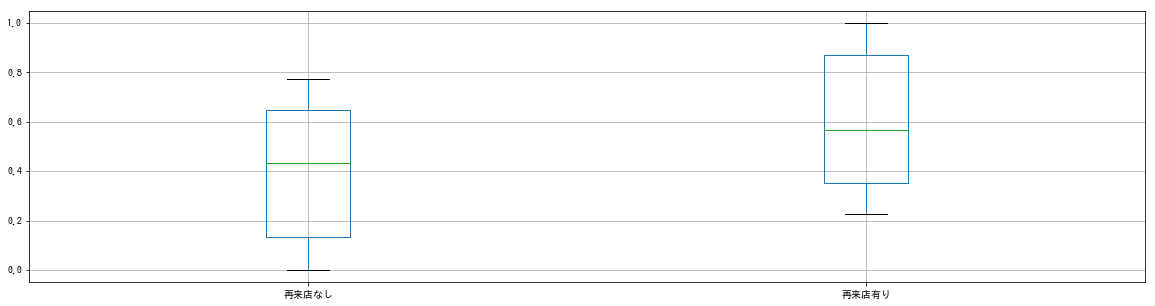

In [17]:
# 予測来店確率
probabilities = model.predict_proba(X)[:, 1]
df_lr_prob = pd.DataFrame()
df_lr_prob['再来店なし'] = 1 - probabilities
df_lr_prob['再来店有り'] = probabilities
df_lr_prob.boxplot()

In [19]:
# 混同行列
cm = confusion_matrix(Y, predictions)
df_cm = pd.DataFrame(index=['実際来店有り', '実際来店なし'])
df_cm['予測来店有り'] = cm[:, 0]
df_cm['予測来店なし'] = cm[:, 1]
df_cm

,予測来店有り,予測来店なし
実際来店有り,290,97
実際来店なし,143,440


In [37]:
# statsmodels で回帰
import statsmodels.api as st
X = df_rfm0.drop(['再来店'], axis=1).values
Y = df_rfm0['再来店'].values
X = st.add_constant(X, prepend = False)
mdl = st.Logit(Y, X)
mdl_fit = mdl.fit(method='lbfgs', maxiter=110)
mdl_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  970
Model:                          Logit   Df Residuals:                      965
Method:                           MLE   Df Model:                            4
Date:                Tue, 12 Feb 2019   Pseudo R-squ.:                  0.2719
Time:                        00:09:51   Log-Likelihood:                -475.03
converged:                       True   LL-Null:                       -652.41
                                        LLR p-value:                 1.631e-75
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0581      0.046      1.251      0.211      -0.033       0.149
x2             0.3757      0.047      7.968      0.000       0.283       0.468
x3             0.0287      0.016      1.772      0.076      -0.003       0.061
x4            -0.0020      0.002     -1.008      0.313      -0.006       0.002
const         -1.7733      0.285     -6.231      0.000      -2.331      -1.215
==============================================================================
"""

## 7.3 因子分析・共分散構造分析による顧客の潜在的ニーズの構造分析

In [3]:
df_survey_sheet = pd.read_excel('978-4-274-22101-9.xlsx', 'アンケート・データ')
df_survey_sheet

,No.,x1,x2,x3,x4,x5,x6,x7,x8,y1,y2,Unnamed: 11,変数,質問項目,略称
0,1,3,3,4,4,4,4,4,3,3,5,NaN,x1,現在の企業のビジネスに社会的価値を見出せるか,社会的価値
1,2,3,1,2,4,3,3,2,2,4,3,NaN,x2,現在の企業のビジネスは周囲の関係者に良好な影響を与えているか,周囲への影響
2,3,1,1,1,1,5,3,1,1,5,4,NaN,x3,現在の企業のビジネスは顧客満足を獲得できているか,顧客の満足
3,4,4,4,4,4,4,4,4,4,3,3,NaN,x4,自分自身の仕事へ誇りを持てるか,仕事への誇り
4,5,4,1,3,5,3,2,5,3,3,5,NaN,x5,自分自身は企業や上司から適切に評価されているか,適切な評価
5,6,4,4,4,4,4,3,4,4,3,2,NaN,x6,自分自身は現在心身共に健康的に働いているか,健康的
6,7,5,4,5,5,5,5,5,5,1,1,NaN,x7,自分自身は現在の仕事に達成感を感じるか,達成感
7,8,3,4,4,5,4,3,4,4,3,4,NaN,x8,仕事を通じて自分自身は成長していると感じるか,成長
8,9,4,4,4,4,4,4,4,5,4,4,NaN,y1,今後も現在の企業に続けて勤めたいと感じるか,継続
9,10,3,3,4,4,2,2,3,3,5,5,NaN,y2,今後の自分自身の成長のために現在の企業で様々な挑戦をしたいか,挑戦


In [9]:
df_survey = df_survey_sheet.iloc[0:85, 1:11]
df_survey_x = df_survey.drop(['y1', 'y2'], axis=1)
df_survey_x

,x1,x2,x3,x4,x5,x6,x7,x8
0,3,3,4,4,4,4,4,3
1,3,1,2,4,3,3,2,2
2,1,1,1,1,5,3,1,1
3,4,4,4,4,4,4,4,4
4,4,1,3,5,3,2,5,3
5,4,4,4,4,4,3,4,4
6,5,4,5,5,5,5,5,5
7,3,4,4,5,4,3,4,4
8,4,4,4,4,4,4,4,5
9,3,3,4,4,2,2,3,3


In [34]:
# Execute command below, restart kernel.
! conda install -y -c desilinguist factor_analyzer

Solving environment: done

## Package Plan ##

  environment location: /home/opt/anaconda3

  added / updated specs: 
    - factor_analyzer


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.6.2                |           py36_0         1.6 MB
    factor_analyzer-0.2.3      |   py36hc873e9d_0          43 KB  desilinguist
    ------------------------------------------------------------
                                           Total:         1.7 MB

The following NEW packages will be INSTALLED:

    factor_analyzer: 0.2.3-py36hc873e9d_0 desilinguist

The following packages will be UPDATED:

    conda:           4.5.4-py36_0                      --> 4.6.2-py36_0


conda-4.6.2          |  1.6 MB | ####################################### | 100% 
factor_analyzer-0.2. |   43 KB | ####################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Exe

In [11]:
from factor_analyzer import FactorAnalyzer

# 回転なし
model = FactorAnalyzer()
model.analyze(df_survey_x, 3, rotation=None)
model.loadings

,Factor1,Factor2,Factor3
x1,0.747377,-0.228480,0.195594
x2,0.719510,-0.298688,0.146235
x3,0.767894,-0.223183,0.276853
x4,0.627148,-0.293817,-0.081698
x5,0.664443,0.729224,0.154949
x6,0.571492,0.381410,0.080757
x7,0.830008,0.071582,-0.365009
x8,0.792693,-0.025984,-0.326612


In [12]:
model.get_factor_variance()

,Factor1,Factor2,Factor3
SS Loadings,4.144605,0.960597,0.413402
Proportion Var,0.518076,0.120075,0.051675
Cumulative Var,0.518076,0.638150,0.689825


In [13]:
# varimax回転
model.analyze(df_survey_x, 3, rotation='varimax')
fa_varimax = model.loadings
fa_varimax

,Factor1,Factor2,Factor3
x1,0.729120,0.224448,0.258919
x2,0.724416,0.139788,0.289784
x3,0.779839,0.259326,0.201795
x4,0.547668,0.041377,0.429726
x5,0.129696,0.973180,0.182649
x6,0.220195,0.618639,0.217710
x7,0.347995,0.374662,0.752195
x8,0.394613,0.284570,0.706409


In [24]:
model.get_factor_variance()

,Factor1,Factor2,Factor3
SS Loadings,2.306611,1.690025,1.521968
Proportion Var,0.288326,0.211253,0.190246
Cumulative Var,0.288326,0.499579,0.689825


In [14]:
# promax回転
model.analyze(df_survey_x, 3, rotation='promax')
fa_promax = model.loadings
fa_promax

,Factor1,Factor2,Factor3
x1,0.780169,0.064271,-0.005609
x2,0.765467,-0.039764,0.059250
x3,0.877484,0.113488,-0.119559
x4,0.459258,-0.167093,0.365319
x5,-0.055504,1.019599,0.003093
x6,0.085389,0.596400,0.086576
x7,-0.039149,0.138703,0.857833
x8,0.060878,0.044434,0.788420


In [26]:
model.get_factor_variance()

,Factor1,Factor2,Factor3
SS Loadings,2.191111,1.463000,1.516283
Proportion Var,0.273889,0.182875,0.189535
Cumulative Var,0.273889,0.456764,0.646299


### 7.3.2 共分散構造分析による因子間因果関係の分析

In [2]:
df_survey_sheet = pd.read_excel('978-4-274-22101-9.xlsx', 'アンケート・データ')
df_survey = df_survey_sheet.iloc[0:85, 1:11]
df_survey.head()

,x1,x2,x3,x4,x5,x6,x7,x8,y1,y2
0,3,3,4,4,4,4,4,3,3,5
1,3,1,2,4,3,3,2,2,4,3
2,1,1,1,1,5,3,1,1,5,4
3,4,4,4,4,4,4,4,4,3,3
4,4,1,3,5,3,2,5,3,3,5


In [1]:
# R 3.5 関連パッケージインストール
# sudo apt-key adv --keyserver keys.gnupg.net --recv-key 'E19F5F87128899B192B1A2C2AD5F960A256A04AF'
# sudo add-apt-repository 'deb http://cran.ism.ac.jp//bin/linux/debian stretch-cran35/'
# sudo apt update
# sudo apt install r-base, libxml2-dev
# mkdir ./rlib
# R -e "install.packages('XML', repos='http://cran.ism.ac.jp', lib=''./rlib')"
# R -e "install.packages('lavaan', repos='http://cran.ism.ac.jp', lib='./rlib')" >/tmp/R.install.packages.log1 2>&1
# R -e "install.packages(semPlot, repos=http://cran.ism.ac.jp, lib=./rlib)" >/tmp/R.install.packages.log 2>&1

In [1]:
! pip install pyper 

You are using pip version 10.0.1, however version 19.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [10]:
import pyper
df_survey_std = (df_survey - df_survey.mean()) / df_survey.std()
r = pyper.R(RCMD="/usr/bin/R", use_numpy='True', use_pandas='True')
r.assign("dat", df_survey_std)
r("source(file='./lavaan.R')")

"try({source(file='./lavaan.R')})\nThis is lavaan 0.6-3\nlavaan is BETA software! Please report any bugs.\n"

In [15]:
r.get('rel')

array([[ 1.        ,  0.6178909 ,  0.69080614,  0.52777278,  0.359341  ,
         0.35471026,  0.54296675,  0.52268732, -0.16836225, -0.20055818],
       [ 0.6178909 ,  1.        ,  0.66036955,  0.532361  ,  0.25876002,
         0.36088174,  0.47793778,  0.57070656, -0.18182711, -0.06425768],
       [ 0.69080614,  0.66036955,  1.        ,  0.51602612,  0.40652948,
         0.34085238,  0.54287676,  0.50732581, -0.15527138, -0.09766135],
       [ 0.52777278,  0.532361  ,  0.51602612,  1.        ,  0.19785614,
         0.22551169,  0.53968738,  0.52007794, -0.01202484,  0.00588977],
       [ 0.359341  ,  0.25876002,  0.40652948,  0.19785614,  1.        ,
         0.67327486,  0.53804165,  0.46724701,  0.07806892, -0.00776712],
       [ 0.35471026,  0.36088174,  0.34085238,  0.22551169,  0.67327486,
         1.        ,  0.4821669 ,  0.4031935 , -0.04397717, -0.07704695],
       [ 0.54296675,  0.47793778,  0.54287676,  0.53968738,  0.53804165,
         0.4821669 ,  1.        ,  0.776273  

In [10]:
print(r("summary(fit, standardized=TRUE, fit.measure=TRUE)"))

try({summary(fit, standardized=TRUE, fit.measure=TRUE)})
lavaan 0.6-3 ended normally after 42 iterations

  Optimization method                           NLMINB
  Number of free parameters                         26

  Number of observations                            85

  Estimator                                         ML
  Model Fit Test Statistic                      33.445
  Degrees of freedom                                29
  P-value (Chi-square)                           0.260

Model test baseline model:

  Minimum Function Test Statistic              432.087
  Degrees of freedom                                45
  P-value                                        0.000

User model versus baseline model:

  Comparative Fit Index (CFI)                    0.989
  Tucker-Lewis Index (TLI)                       0.982

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)              -1001.747
  Loglikelihood unrestricted model (H1)       -985.025

  Number of fr

![上記モデルのパス図](./sem.png)

## 7.4 確率選択モデルによる購買行動モデル

テキストで扱っているモデルはRのmlogitのドキュメントからすると conditional logit と呼ばれるもののようで、コレを計算するpythonモジュールはない模様。

In [3]:
df_prod_select = pd.read_excel('978-4-274-22101-9.xlsx', '商品選択データ')
df_prod_select = df_prod_select.iloc[0:200, 0:9]
df_prod_select.head()

,選択商品,価格A,価格B,価格C,価格PB,チラシA,チラシB,チラシC,チラシD
0,A,238,228,238,178,0,1,0,0
1,A,158,228,178,158,0,0,0,0
2,A,178,238,238,178,1,0,0,0
3,B,228,158,228,178,0,1,0,0
4,A,178,218,228,178,0,0,0,0


In [4]:
df_prod_select = df_prod_select.rename({'チラシD': 'チラシPB' }, axis=1)
df_prod_select.head()

,選択商品,価格A,価格B,価格C,価格PB,チラシA,チラシB,チラシC,チラシPB
0,A,238,228,238,178,0,1,0,0
1,A,158,228,178,158,0,0,0,0
2,A,178,238,238,178,1,0,0,0
3,B,228,158,228,178,0,1,0,0
4,A,178,218,228,178,0,0,0,0


In [24]:
# R版
# R -e "install.packages('mlogit', repos='http://cran.ism.ac.jp', lib='./rlib')"
# https://www.rdocumentation.org/packages/mlogit/versions/0.4-1/topics/mlogit

import pyper

# 日本語が使えない？ので名称をascii化する
# PBを基準にしたいのでA-Cの先頭にZをつけておく。アルファベット順？で先頭が基準になる模様
df_logit_e = pd.DataFrame()
df_logit_e['prod'] = df_prod_select['選択商品'].map({'A': 'ZA', 'B': 'ZB', 'C': 'ZC'})
df_logit_e['price.ZA'] = df_prod_select['価格A']
df_logit_e['price.ZB'] = df_prod_select['価格B']
df_logit_e['price.ZC'] = df_prod_select['価格C']
df_logit_e['price.PB'] = df_prod_select['価格PB']
df_logit_e['flyer.ZA'] = df_prod_select['チラシA']
df_logit_e['flyer.ZB'] = df_prod_select['チラシB']
df_logit_e['flyer.ZC'] = df_prod_select['チラシC']
df_logit_e['flyer.PB'] = df_prod_select['チラシPB']
r = pyper.R(RCMD="/usr/bin/R", use_numpy='True', use_pandas='True')
r(".libPaths('./rlib')")
r("library(mlogit)")
r.assign("df", df_logit_e)
r("data   <- mlogit.data(df, shape='wide', varying=2:9, choice='prod')")
head = r("head(data, 10)")
print(head)

try({head(data, 10)})
      prod alt price flyer chid
1.PB FALSE  PB   178     0    1
1.ZA  TRUE  ZA   238     0    1
1.ZB FALSE  ZB   228     1    1
1.ZC FALSE  ZC   238     0    1
2.PB FALSE  PB   158     0    2
2.ZA  TRUE  ZA   158     0    2
2.ZB FALSE  ZB   228     0    2
2.ZC FALSE  ZC   178     0    2
3.PB FALSE  PB   178     0    3
3.ZA  TRUE  ZA   178     1    3



In [25]:
r("result <- mlogit(prod ~ price + flyer, data)")
print(r("summary(result)"))

try({summary(result)})

Call:
mlogit(formula = prod ~ price + flyer, data = data, method = "nr")

Frequencies of alternatives:
      PB       ZA       ZB       ZC 
0.000000 0.664557 0.297468 0.037975 

nr method
18 iterations, 0h:0m:0s 
g'(-H)^-1g = 9.46E-07 
gradient close to zero 

Coefficients :
                  Estimate  Std. Error z-value  Pr(>|z|)    
ZA:(intercept)  2.1009e+01  1.6955e+03  0.0124 0.9901137    
ZB:(intercept)  2.0153e+01  1.6955e+03  0.0119 0.9905168    
ZC:(intercept)  1.8776e+01  1.6955e+03  0.0111 0.9911644    
price          -3.3231e-02  5.7964e-03 -5.7329  9.87e-09 ***
flyer           1.8321e+00  4.9460e-01  3.7042 0.0002121 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Log-Likelihood: -89.323
McFadden R^2:  NaN 
Likelihood ratio test : chisq = NaN (p.value = NA)

